# Data exploration of grand Lyon open data (Silos de Verre)
Data from https://data.grandlyon.com/environnement/silo-verre-de-la-mftropole-de-lyon/

In [1]:
import pandas as pd
import json
import numpy as np
import requests
import os
import pdvega
from sklearn.neighbors.kde import KernelDensity
from sklearn import preprocessing
import matplotlib.pyplot as plt

## Silos à verre

In [2]:
DOWNLOAD_LINK = 'https://download.data.grandlyon.com/wfs/grandlyon?SERVICE=WFS&VERSION=2.0.0&outputformat=GEOJSON&maxfeatures=-1&request=GetFeature&typename=gic_collecte.gicsiloverre&SRSNAME=urn:ogc:def:crs:EPSG::4171'
resp = requests.get(DOWNLOAD_LINK)
silos_json = json.loads(resp.text)
len(silos_json['features'])

2664

In [3]:
silos = pd.DataFrame(silos_json['features'])
silos

,geometry,properties,type
0,"{'coordinates': [4.77591697654058, 45.81498325...","{'identifiant': '1010', 'numerodansvoie': '124...",Feature
1,"{'coordinates': [4.861098952153298, 45.6982273...","{'identifiant': '7019', 'numerodansvoie': '', ...",Feature
2,"{'coordinates': [4.861919124788326, 45.6983339...","{'identifiant': '7022', 'numerodansvoie': '', ...",Feature
3,"{'coordinates': [4.862504683993234, 45.6981478...","{'identifiant': '7027', 'numerodansvoie': '', ...",Feature
4,"{'coordinates': [4.861531281096473, 45.6975972...","{'identifiant': '7029', 'numerodansvoie': '', ...",Feature
5,"{'coordinates': [4.862899594218828, 45.6966386...","{'identifiant': '7030', 'numerodansvoie': '', ...",Feature
6,"{'coordinates': [4.862960925894054, 45.6968963...","{'identifiant': '7031', 'numerodansvoie': '', ...",Feature
7,"{'coordinates': [4.863267237346714, 45.6964191...","{'identifiant': '7032', 'numerodansvoie': '', ...",Feature
8,"{'coordinates': [4.838848246689661, 45.7489422...","{'identifiant': '7675', 'numerodansvoie': '26'...",Feature
9,"{'coordinates': [4.832169644313046, 45.8651308...","{'identifiant': '1004', 'numerodansvoie': '1',...",Feature


In [4]:
silo_coords = pd.DataFrame([v['coordinates'] for v in silos.geometry.values], columns=['longitude', 'latitude'])
silo_coords

,longitude,latitude
0,4.775917,45.814983
1,4.861099,45.698227
2,4.861919,45.698334
3,4.862505,45.698148
4,4.861531,45.697597
5,4.862900,45.696639
6,4.862961,45.696896
7,4.863267,45.696419
8,4.838848,45.748942
9,4.832170,45.865131


In [5]:
props = pd.DataFrame(silos.properties.values.tolist())
props

,code_insee,code_postal,commune,gestionnaire,gid,identifiant,numerodansvoie,observation,voie
0,69116,69760,LIMONEST,Col Nord-Ouest,1,1010,1244,Arrêt de bus vers Aviva,Route Départementale 306
1,69259,69200,VENISSIEUX,Col Sud,2,7019,,Rue lénine Tour 15,Rue Léon Tolstoï
2,69259,69200,VENISSIEUX,Col Sud,3,7022,,Rue Lénine Tour 17,Rue Léon Tolstoï
3,69259,69200,VENISSIEUX,Col Sud,4,7027,,Rue Lénine Tour 19,Boulevard Lénine
4,69259,69200,VENISSIEUX,Col Sud,5,7029,,Rue Lénine Tour 21,Boulevard Lénine
5,69259,69200,VENISSIEUX,Col Sud,6,7030,,Rue Lénine Tour 23,Boulevard Lénine
6,69259,69200,VENISSIEUX,Col Sud,7,7031,,Rue Lénine Tour 25,Boulevard Lénine
7,69259,69200,VENISSIEUX,Col Sud,8,7032,,Rue Lénine Tour 27,Boulevard Lénine
8,69387,69007,LYON 7 ÈME,Col Sud,9,7675,26,,Rue Chevreul
9,69003,69250,ALBIGNY-SUR-SAONE,Col Nord-Ouest,10,1004,1,,Rue Jean Chirat


In [6]:
np.unique(props.gestionnaire)

array(['Col Est', 'Col Nord-Ouest', 'Col Sud'], dtype=object)

In [7]:
np.unique(props.commune)

array(['ALBIGNY-SUR-SAONE', 'BRON', 'CAILLOUX-SUR-FONTAINES',
       'CALUIRE-ET-CUIRE', "CHAMPAGNE-AU-MONT-D'OR",
       'CHARBONNIERES-LES-BAINS', 'CHARLY', 'CHASSIEU',
       "COLLONGES-AU-MONT-D'OR", 'CORBAS', "COUZON-AU-MONT-D'OR",
       'CRAPONNE', "CURIS-AU-MONT-D'OR", 'DARDILLY', 'DECINES-CHARPIEU',
       'ECULLY', 'FEYZIN', 'FLEURIEU-SUR-SAONE', 'FONTAINES-SAINT-MARTIN',
       'FONTAINES-SUR-SAONE', 'FRANCHEVILLE', 'GENAY', 'GIVORS', 'GRIGNY',
       'IRIGNY', 'JONAGE', 'LA MULATIERE', 'LA TOUR-DE-SALVAGNY',
       'LIMONEST', 'LISSIEU', 'LYON 1 ER', 'LYON 2 ÈME', 'LYON 3 ÈME',
       'LYON 4 ÈME', 'LYON 5 ÈME', 'LYON 6 ÈME', 'LYON 7 ÈME',
       'LYON 8 ÈME', 'LYON 9 ÈME', "MARCY-L'ETOILE", 'MEYZIEU', 'MIONS',
       'MONTANAY', 'NEUVILLE-SUR-SAONE', 'OULLINS', 'PIERRE-BENITE',
       "POLEYMIEUX-AU-MONT-D'OR", 'QUINCIEUX', 'RILLIEUX-LA-PAPE',
       'ROCHETAILLEE-SUR-SAONE', "SAINT-CYR-AU-MONT-D'OR",
       "SAINT-DIDIER-AU-MONT-D'OR", 'SAINT-FONS', 'SAINT-GENIS-LAVAL',
 

In [8]:
[p for _, p in props.iterrows() if 'sonde' in p.observation or 'capteur' in p.observation or 'remplissage' in p.observation]

[code_insee                                    69383
 code_postal                                   69003
 commune                                  LYON 3 ÈME
 gestionnaire                                Col Est
 gid                                             998
 identifiant                                    2753
 numerodansvoie                                     
 observation       Equipé d'une sonde de remplissage
 voie                   Rue André Philip / paul Bert
 Name: 997, dtype: object]

## Decheteries

In [9]:
DOWNLOAD_LINK = "https://download.data.grandlyon.com/wfs/grandlyon?SERVICE=WFS&VERSION=2.0.0&outputformat=GEOJSON&maxfeatures=-1&request=GetFeature&typename=gip_proprete.gipdecheterie&SRSNAME=urn:ogc:def:crs:EPSG::4171"
resp = requests.get(DOWNLOAD_LINK)
decheteries_json = json.loads(resp.text)
len(decheteries_json['features'])

20

In [10]:
pd.DataFrame(pd.DataFrame(decheteries_json['features']).properties.values.tolist())

,code_insee,code_postal,commune,gestionnaire,gid,identifiant,numerodansvoie,telephone,voie
0,69096,69520,GRIGNY,UTVM,1,653,28,0472306124,Avenue Chantelot
1,69276,69320,FEYZIN,UTVM,2,1681,26,0478706303,Rue Léon Blum
2,69089,69340,FRANCHEVILLE,UTVM,3,220,29,0478590432,Route de la Gare
3,69277,69740,GENAS,UTVM,4,69,,0478906403,Rue de l'Egalité
4,69283,69780,MIONS,UTVM,5,133,,0478214997,Boulevard des Nations
5,69152,69310,PIERRE-BENITE,UTVM,6,71,,0472392187,Chemin de la Gravière
6,69259,69200,VENISSIEUX,UTVM,7,217,,0478705665,Avenue Jean Moulin
7,69266,69100,VILLEURBANNE,UTVM,8,210,,0478845609,Rue Alfred Brinon
8,69275,69150,DECINES-CHARPIEU,UTVM,9,218,66,0478493504,Rue Paul et Marc Barbezat
9,69387,69007,LYON 7EME,UTVM,10,70,12,0472734657,Boulevard de l'Artillerie


## Poubelles publiques du grand lyon

In [11]:
DOWNLOAD_LINK = "https://download.data.grandlyon.com/wfs/grandlyon?SERVICE=WFS&VERSION=2.0.0&outputformat=GEOJSON&maxfeatures=-1&request=GetFeature&typename=gin_nettoiement.gincorbeille&SRSNAME=urn:ogc:def:crs:EPSG::4171"
resp = requests.get(DOWNLOAD_LINK)
poubelles_json = json.loads(resp.text)
len(poubelles_json['features'])

11521

In [12]:
properties = pd.DataFrame(pd.DataFrame(poubelles_json['features']).properties.values.tolist())
properties

,commune,gestionnaire,gid,identifiant,numerodansvoie,observation,voie
0,CHARBONNIERES-LES-BAINS,NET Sud-Ouest,1,C87944,,A Côté de la librairie Papeterie,Avenue Général de Gaulle
1,CHARBONNIERES-LES-BAINS,NET Sud-Ouest,2,C61463,,long Ave de Gaulle,Place Marsonnat
2,LYON 6 ÈME,NET Centre-Est,3,C24199,19,,Allée Achille Lignon
3,RILLIEUX-LA-PAPE,NET Nord-Ouest,4,C15610,N°2950,,Route de Strasbourg
4,SAINTE-FOY-LES-LYON,NET Sud-Ouest,5,C64433,,Dans le parking du Tommelier,Rue du Vingtain
5,SAINTE-FOY-LES-LYON,NET Sud-Ouest,6,C79746,,Dans le parking du Tommelier,Rue du Vingtain
6,CRAPONNE,NET Sud-Ouest,7,C15794,,Angle J C Martin,Avenue Edouard Millaud
7,DARDILLY,NET Nord-Ouest,8,C11632,,rd pt Parsonge/Grégoire/Liasse parking à côté ...,Chemin du Moulin Carron
8,DARDILLY,NET Nord-Ouest,9,C39230,Face N°40,"Arrêt bus""bois de Dardilly""",Route d'Ecully
9,FRANCHEVILLE,NET Sud-Ouest,10,C47863,,,Place Loano


In [13]:
poubelles_coords = pd.DataFrame([p['geometry']['coordinates'] for p in poubelles_json['features']], columns=['longitude', 'latitude'])
poubelles_coords

,longitude,latitude
0,4.735836,45.783426
1,4.734691,45.785367
2,4.847417,45.781091
3,4.896643,45.820592
4,4.801179,45.737562
5,4.801944,45.737368
6,4.728217,45.747296
7,4.756652,45.812725
8,4.757099,45.798686
9,4.758769,45.746369


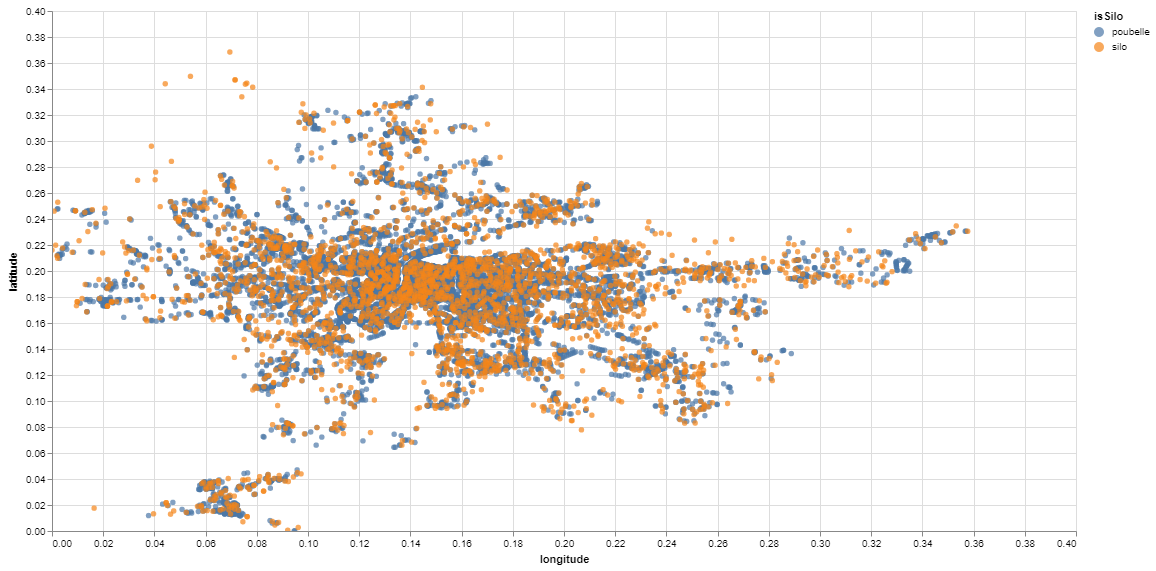

In [14]:
poubelles_coords['isSilo'] = pd.Series('poubelle', index=poubelles_coords.index)
silo_coords['isSilo'] = pd.Series('silo', index=silo_coords.index)
coords = pd.concat([poubelles_coords, silo_coords])
coords.latitude -= min(coords.latitude)
coords.longitude -= min(coords.longitude)
coords.vgplot.scatter('longitude', 'latitude', c='isSilo', width=1024, height=520)

In [15]:
# Normalize dataframe columns
df = poubelles_coords.drop('isSilo', axis=1)
x = df.values
scaler = preprocessing.StandardScaler()
poubelles_coords_norm = pd.DataFrame(scaler.fit_transform(x), columns=df.columns)
silo_coords_norm = pd.DataFrame(scaler.transform(silo_coords.drop('isSilo', axis=1).values), columns=df.columns)

In [16]:
# Fit kernel densoty function to trash data points
kde = KernelDensity(kernel='gaussian', bandwidth=0.03).fit(poubelles_coords_norm)

In [ ]:
x_bins, y_bins = 800j, 800j
grid_x, grid_y = np.mgrid[poubelles_coords_norm.longitude.min():poubelles_coords_norm.longitude.max():x_bins,
                          poubelles_coords_norm.latitude.min():poubelles_coords_norm.latitude.max():y_bins]
xy_sample = np.vstack([grid_x.ravel(), grid_y.ravel()]).T
grid_z = np.reshape(np.exp(kde.score_samples(xy_sample)), grid_x.shape)

plt.figure(figsize=(23, 11))
plt.pcolormesh(grid_x, grid_y, grid_z)
plt.scatter(poubelles_coords_norm.longitude, poubelles_coords_norm.latitude, s=1, alpha=0.4, c='white')
plt.show()

In [ ]:
2

In [ ]:
plt.figure(figsize=(23, 11))
plt.pcolormesh(grid_x, grid_y, grid_z)
plt.show()

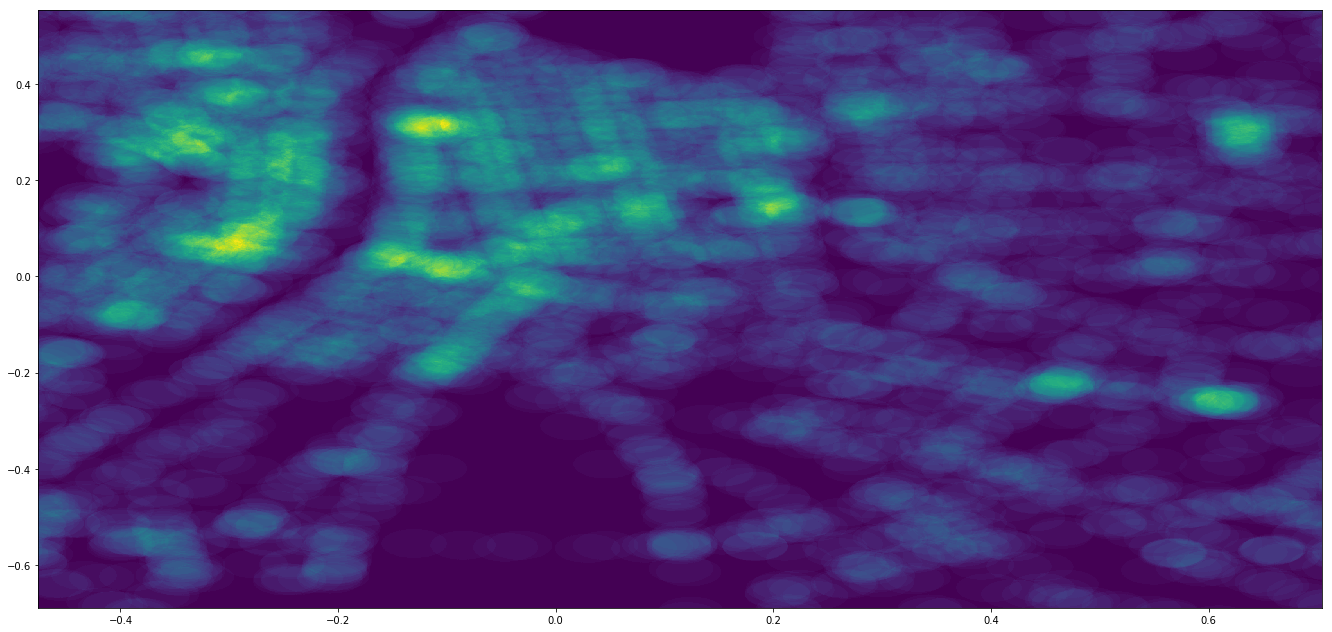

In [19]:
x_bins, y_bins = 1500j, 500j
grid_x, grid_y = np.mgrid[poubelles_coords_norm.longitude.min()/6:poubelles_coords_norm.longitude.max()/6:x_bins,
                          poubelles_coords_norm.latitude.min()/6:poubelles_coords_norm.latitude.max()/6:y_bins]
xy_sample = np.vstack([grid_x.ravel(), grid_y.ravel()]).T
grid_z = np.reshape(np.exp(kde.score_samples(xy_sample)), grid_x.shape)

plt.figure(figsize=(23, 11))
plt.pcolormesh(grid_x, grid_y, grid_z)
plt.show()

In [20]:
# We now sample from learn density function in order to find new places where we could put trashes (bottle bank)
samples = kde.sample(n_samples=1000)
samples

array([[ 0.5300995 , -1.33709264],
       [-0.16140482,  1.37993176],
       [ 0.18669244,  1.67319332],
       ..., 
       [ 0.73454295,  0.34729902],
       [-0.5655759 ,  0.39383206],
       [ 0.67401407,  0.15146898]])